<a href="https://colab.research.google.com/github/RachitBansal/RedditFlairDetector/blob/master/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [85]:
df = pd.read_csv('./drive/My Drive/rMIDAS_final.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
df.head(10)

,created_utc,id,link_flair_text,num_comments,selftext,title,url
0,1554185977,b8fe48,NaN,2.0,NaN,Opinion | A theory about the sudden rise of Nitin Gadkari,https://www.livemint.com/opinion/columns/opinion-a-theory-about-the-sudden-rise-of-nitin-gadkari-1554059463808.html
1,1515991106,7qhc9y,NaN,0.0,[deleted],PU Colleges in Mangalore.,https://www.reddit.com/r/india/comments/7qhc9y/pu_colleges_in_mangalore/
2,1558945602,btjiv5,Politics,3.0,NaN,Remembering Jawaharlal Nehru on his death anniversary,https://i.redd.it/txph3eq1sp031.jpg
3,1501064512,6pn4gj,Non-Political,0.0,NaN,"[FRESH VIDEO] Armaan Malik - 'Barfani' (Babumoshai Bandookbaaz, Nawazuddin Siddiqui, Bidita Bag)",https://www.youtube.com/watch?v=LzETSqumgCY
4,1517726535,7v59mr,NaN,0.0,NaN,"7,000 super-rich Indians shifted overseas in 2017; 10,000 from China",http://zeenews.india.com/india/7000-super-rich-indians-shifted-overseas-in-2017-10000-from-china-2078535.html
5,1574087019,dy3t9k,Non-Political,2.0,"Today I had an appointment for my kid's passport application. I had already visited last time but it was kept on hold saying the birth certificate needs to be modified. \n\nNow after numerous back and forth for scanning documents among A, B and C counters, the C counter officer tells me that verification will be carried out. \n\nThis when I endorsed my wife's name on my passport just a while a...",Whims and fancies of officers at PSK [NP],https://www.reddit.com/r/india/comments/dy3t9k/whims_and_fancies_of_officers_at_psk_np/
6,1410478029,2g5gqn,Non-Political,1.0,NaN,"Rann Utsav - A festival in the deserts of Kutch, Gujarat.",http://www.rannutsav.net/
7,1483609441,5m5j3f,Science/Technology,3.0,NaN,CCMB signs MoUs with four startups,http://economictimes.indiatimes.com/small-biz/startups/ccmb-signs-mous-with-four-startups/articleshow/56310976.cms
8,1479750176,5e5caf,Politics,0.0,[deleted],PM Modi didn't do his homework,http://www.forbes.com/sites/panosmourdoukoutas/2016/11/20/pm-modi-didnt-do-his-homework/2/#3357d4b378b3
9,1492613889,66aplw,Politics,2.0,NaN,GST rules: One leg still stuck in old taxes,http://www.forbesindia.com/article/special/gst-rules-one-leg-still-stuck-in-old-taxes/46731/1


In [87]:
flairs_to_keep = []
flairs_in_df = list( dict.fromkeys(list(df.loc[:, 'link_flair_text'].values)))
print(len(flairs_in_df))
for flair in flairs_in_df:
  count = np.sum(df.loc[:, 'link_flair_text'].values == flair)
  if(count>500):
    print(flair, "\t", count)
    flairs_to_keep.append(flair)

731
Politics 	 129061
Non-Political 	 204007
Science/Technology 	 14010
AskIndia 	 45811
Policy/Economy 	 18642
Coronavirus 	 7004
Entertainment 	 4421
Repost. 	 2307
Sports 	 6217
Stickied Topic. 	 799
Policy 	 2306
[R]eddiquette 	 10424
Business/Finance 	 17436
All CAPS. 	 1700
Not in English. 	 4666
Meta. 	 529
Food 	 3395
Demonetization 	 6457
Scheduled 	 1754
Repost; 	 1284
Science &amp; Technology 	 1810
Business &amp; Finance 	 892
Policy &amp; Economy 	 2012
Low-effort self-post. 	 1231
Not about India. 	 2615
Unverified Content. 	 930
Photography 	 4331
Not Original Title. 	 2117
CAA-NRC 	 1070


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749973 entries, 0 to 749972
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_utc      749970 non-null  object 
 1   id               749956 non-null  object 
 2   link_flair_text  509337 non-null  object 
 3   num_comments     749931 non-null  float64
 4   selftext         208140 non-null  object 
 5   title            696974 non-null  object 
 6   url              696975 non-null  object 
dtypes: float64(1), object(6)
memory usage: 40.1+ MB


In [89]:
df = df.dropna('index', subset = ['title', 'link_flair_text'])
df['num_comments'] = df['num_comments'].astype(int)
df = df.reset_index()
df = df.drop('index', 'columns')
print(df.shape)

(456357, 7)


In [0]:
for i in range(df.shape[0]):
  if(i%10000 == 0):
    print(i)
  if(df.loc[i, 'link_flair_text'] not in flairs_to_keep):
    df = df.drop(i, 'index')
    continue
  df.loc[i, 'num_comments'] = int(df.loc[i, 'num_comments'])
  if(df.loc[i, 'selftext'] == '[deleted]'):
    df.loc[i, 'selftext'] = 'None'

In [61]:
df.shape

(319079, 7)

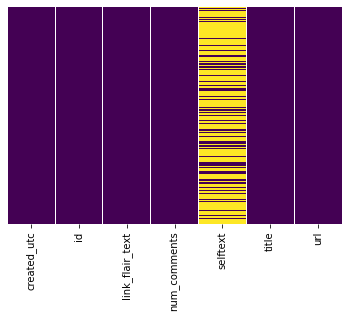

In [90]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [65]:
!pip install pytorch-nlp

  Created wheel for edm: filename=edm-0.0.4-cp36-none-any.whl size=10639 sha256=dc7fff05609ffc37f56c5bcaece4a96b3cbbe14af2bf56291b52332a424a13ac
  Stored in directory: /root/.cache/pip/wheels/f5/9b/f6/778ef88e921a1c1ef7b9d04d1af501a7014d89e941c3301c56
Successfully built edm


In [0]:
import torchnlp
from torchnlp.encoders import LabelEncoder

In [0]:
df_cols = {'link_flair_text':[], 'num_comments':[], 'selftext':[], 'title':[], 'url':[]}

In [0]:
for i in range(df.shape[0]):
  df_cols['link_flair_text'].append(df.loc[i, 'link_flair_text'])
  df_cols['title'].append(len(df.loc[i, 'title']))
  df_cols['url'].append(len(df.loc[i, 'url']))
  df_cols['num_comments'].append(int(df.loc[i, 'num_comments']))
  if type(df.loc[i, 'selftext']) != float:
    df_cols['selftext'].append(len(df.loc[i, 'selftext']))
  else:
    df_cols['selftext'].append(0)

In [93]:
len(df_cols['title'])

456357

In [0]:
encoder = LabelEncoder(df_cols['link_flair_text'])

In [0]:
df_cols['link_flair_text'] = encoder.batch_encode(df_cols['link_flair_text'])

In [96]:
df_supp = pd.DataFrame(df_cols)
df_supp.head(10)

,link_flair_text,num_comments,selftext,title,url
0,1,3,0,53,35
1,2,0,0,96,43
2,2,2,1019,41,87
3,2,1,0,57,25
4,3,3,0,34,114
5,1,0,9,30,103
6,1,2,0,43,93
7,1,1,1623,71,92
8,1,0,0,52,33
9,1,0,0,110,62


In [97]:
df_supp.describe()

,link_flair_text,num_comments,selftext,title,url
count,456357.000000,456357.000000,456357.000000,456357.000000,456357.000000
mean,7.138703,11.099236,102.990010,70.116334,90.176947
std,22.465501,52.198631,514.516165,41.111412,41.344201
min,1.000000,-3.000000,0.000000,1.000000,4.000000
25%,1.000000,0.000000,0.000000,45.000000,60.000000
50%,2.000000,1.000000,0.000000,64.000000,93.000000
75%,5.000000,7.000000,9.000000,83.000000,115.000000
max,705.000000,11706.000000,39826.000000,318.000000,2107.000000


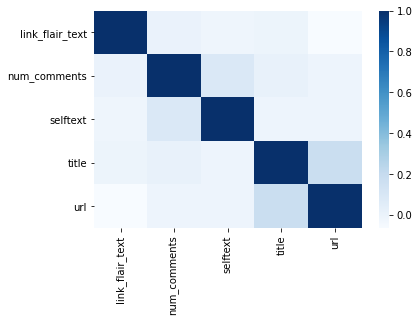

In [98]:
plt.figure(figsize=(6,4))
sns.heatmap(df_supp.corr(),cmap='Blues',annot=False) 

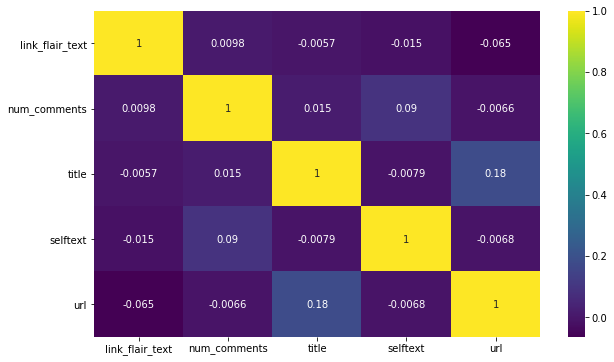

In [99]:
k = 5 #number of variables for heatmap
cols = df_supp.corr().nlargest(k, 'link_flair_text')['link_flair_text'].index
cm = df_supp[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

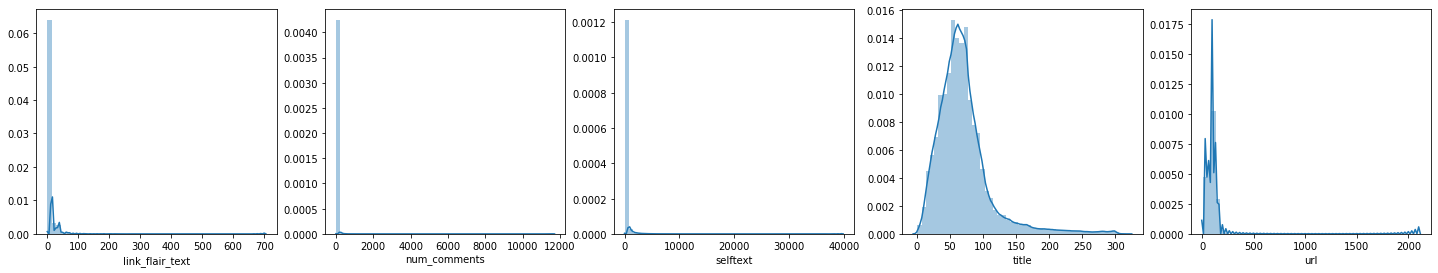

In [100]:
l = df_supp.columns.values
n_cols = 5
n_rows = len(l)-1/n_cols
plt.figure(figsize=(2*n_cols+15,5*n_rows))
for i in range(0,len(l)):
    plt.subplot(n_rows+1, n_cols, i+1)
    sns.distplot(df_supp[l[i]],kde=True)